In [1]:
from collections import namedtuple

import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

In [2]:
from sympy.physics.units import convert_to, newton, meter
mm = meter / 1000
MPa = 1e6 * newton / meter**2
GPa = 1e9 * newton / meter**2

In [3]:
def load(file):
    data = pd.read_csv(file, header=[0,1], index_col=0)

    data.columns= ['extension', 'load']

    data.extension *= mm
    data.load *= newton
    
    return data

In [8]:
sample1 = load('data/Packing_Peanuts_Instron/Starch_1.is_comp_RawData/Specimen_RawData_1.csv')

In [9]:
def process(data, area, length):
    data['stress'] = data.load / area
    data['strain'] = data.extension / length

process(sample1, 10*mm**2, 10*mm)

In [10]:
sample1.head()

,extension,load,stress,strain
0.0,-2.7e-7*meter,-0.00655*newton,-655.0*newton/meter**2,-2.70000000000000e-5
0.1,-2.67e-6*meter,-0.0203*newton,-2030.0*newton/meter**2,-0.000267000000000000
0.2,-1.307e-5*meter,-0.02163*newton,-2163.0*newton/meter**2,-0.00130700000000000
0.3,-2.613e-5*meter,-0.02526*newton,-2526.0*newton/meter**2,-0.00261300000000000
0.4,-3.827e-5*meter,-0.02419*newton,-2419.0*newton/meter**2,-0.00382700000000000


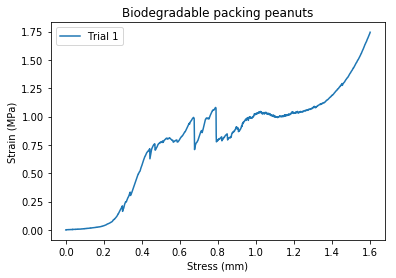

In [6]:
plt.xlabel('Stress (mm)')
plt.ylabel('Strain (MPa)')
plt.title('Biodegradable packing peanuts')

plt.plot(-sample1.strain, -sample1.stress / MPa, label='Trial 1')

plt.legend();